# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

In [683]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [684]:
x = np.array([2, 3, 5])
y = np.array([1, 3, 4])

In [685]:
def gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    # print(theta)
    # loss_history = []
    iterations = 0
    for _ in range(max_iter):
        iterations += 1
        predictions = X.dot(theta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        new_theta = theta - lr * gradient
        # loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        # loss_history.append(loss)
        if np.linalg.norm(new_theta - theta) < eps:
            break
        theta = new_theta
    
    return theta, iterations


In [686]:
def batch_gradient_descent(X, y, batch_size, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    iterations = 0
    for _ in range(max_iter):
        iterations += 1
        np.random.shuffle(X)
        # X = X[:batch_size, :]
        predictions = X.dot(theta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        new_theta = theta - lr * gradient
        
        if np.linalg.norm(new_theta - theta) < eps:
            break
            
        theta = new_theta

    return theta, iterations

In [687]:
def get_gradient(X, y, type='default', lr=0.01, max_iter=1000, eps=1e-6, batch_size=5):
    if type == 'default':
        return batch_gradient_descent(X, y, len(X), lr, max_iter, eps)
    elif type == 'batch':
        return batch_gradient_descent(X, y, batch_size, lr, max_iter, eps)
    elif type == 'stochastic':
        return batch_gradient_descent(X, y, 1, lr, max_iter, eps)
    else:
        raise ValueError('Invalid type')

In [688]:
def get_prediction(theta, x):
    return theta[1] * x + theta[0]

In [689]:
theta, iterations = get_gradient(x, y, type='default', lr=0.01, max_iter=1000, eps=1e-6)
print("Веса, найденные градиентным спуском:", theta)

[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 5.]
 [1. 2.]
 [1. 3.]]
[[1. 5.]
 [1. 2.]
 [1. 3.]]
[[1. 5.]
 [1. 3.]
 [1. 2.]]
[[1. 5.]
 [1. 3.]
 [1. 2.]]
[[1. 5.]
 [1. 2.]
 [1. 3.]]
[[1. 5.]
 [1. 2.]
 [1. 3.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 3.]
 [1. 5.]
 [1. 2.]]
[[1. 3.]
 [1. 5.]
 [1. 2.]]
[[1. 3.]
 [1. 5.]
 [1. 2.]]
[[1. 3.]
 [1. 5.]
 [1. 2.]]
[[1. 5.]
 [1. 3.]
 [1. 2.]]
[[1. 5.]
 [1. 3.]
 [1. 2.]]
[[1. 2.]
 [1. 5.]
 [1. 3.]]
[[1. 2.]
 [1. 5.]
 [1. 3.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 5.]
 [1. 3.]]
[[1. 2.]
 [1. 5.]
 [1. 3.]]
[[1. 3.]
 [1. 2.]
 [1. 5.]]
[[1. 3.]
 [1. 2.]
 [1. 5.]]
[[1. 5.]
 [1. 2.]
 [1. 3.]]
[[1. 5.]
 [1. 2.]
 [1. 3.]]
[[1. 3.]
 [1. 2.]
 [1. 5.]]
[[1. 3.]
 [1. 2.]
 [1. 5.]]
[[1. 3.]
 [1. 5.]
 [1. 2.]]
[[1. 3.]
 [1. 5.]
 [1. 2.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 3.]
 [1. 5.]]
[[1. 2.]
 [1. 5.]
 [

In [690]:
X = np.c_[np.ones(x.shape[0]), x]
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Веса, найденные нормальным уравнением:", theta_normal)

Веса, найденные нормальным уравнением: [-0.42857143  0.92857143]


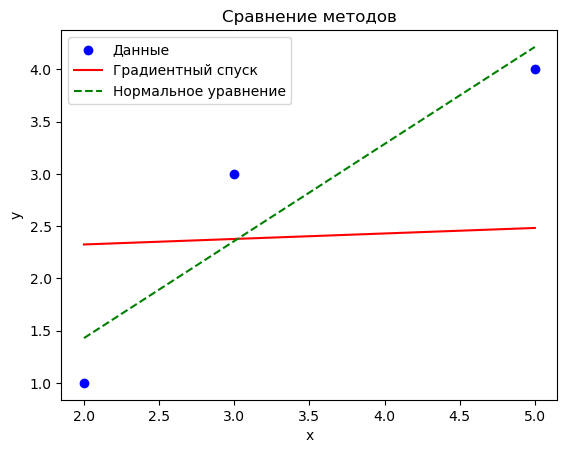

In [691]:
plt.scatter(x, y, color='blue', label='Данные')
y_pred_gd = X.dot(theta)
plt.plot(x, y_pred_gd, color='red', label='Градиентный спуск')
y_pred_ne = X.dot(theta_normal)
plt.plot(x, y_pred_ne, color='green', linestyle='--', label='Нормальное уравнение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение методов')
plt.show()


**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [699]:
data_train = np.loadtxt('../data/ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('../data/ml_lab1_test.txt', delimiter=',')
print(data_train)
print("--")
np.random.shuffle(data_train)
print(data_train)
X_train = data_train[:, 0]
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]

[[-0.2         4.10083261]
 [-0.14        4.75632474]
 [-0.08        4.16278839]
 [-0.02        4.94568077]
 [ 0.04        4.9964461 ]
 [ 0.1         3.67344585]
 [ 0.16        4.07405522]
 [ 0.22        4.12650853]
 [ 0.28        5.25101279]
 [ 0.34        5.69160283]
 [ 0.4         5.06788376]
 [ 0.46        6.07176274]
 [ 0.52        5.76661215]
 [ 0.58        5.76998646]
 [ 0.64        5.39647832]
 [ 0.7         5.46744837]
 [ 0.76        5.46450349]
 [ 0.82        7.23168494]
 [ 0.88        6.09781368]
 [ 0.94        7.0778812 ]
 [ 1.          7.05182585]]
--
[[ 1.          7.05182585]
 [ 0.58        5.76998646]
 [ 0.34        5.69160283]
 [-0.2         4.10083261]
 [ 0.76        5.46450349]
 [ 0.64        5.39647832]
 [ 0.04        4.9964461 ]
 [-0.08        4.16278839]
 [ 0.46        6.07176274]
 [ 0.52        5.76661215]
 [ 0.22        4.12650853]
 [ 0.4         5.06788376]
 [ 0.82        7.23168494]
 [-0.14        4.75632474]
 [ 0.94        7.0778812 ]
 [ 0.16        4.0740552

In [693]:
from sklearn.metrics import mean_squared_error
def check_learning_speed(type):
    print(f"gradient type: {type}")
    for i in [0.5, 1.0, 2.0]:
        print(f"learning rate: {i}")
        theta, iterations = get_gradient(X_train, y_train, type=type, lr=i)
        print(f"TRAIN: theta = {theta} iterations = {iterations}")
        y_train_pred = get_prediction(theta, X_train)
        y_test_pred = get_prediction(theta, X_test)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        print(f"MSE TRAIN: {mse_train}, MSE TEST: {mse_test}")

In [694]:
check_learning_speed('default')
check_learning_speed('batch')
check_learning_speed('stochastic')

gradient type: default
learning rate: 0.5
[[ 1.   -0.2 ]
 [ 1.   -0.14]
 [ 1.   -0.08]
 [ 1.   -0.02]
 [ 1.    0.04]
 [ 1.    0.1 ]
 [ 1.    0.16]
 [ 1.    0.22]
 [ 1.    0.28]
 [ 1.    0.34]
 [ 1.    0.4 ]
 [ 1.    0.46]
 [ 1.    0.52]
 [ 1.    0.58]
 [ 1.    0.64]
 [ 1.    0.7 ]
 [ 1.    0.76]
 [ 1.    0.82]
 [ 1.    0.88]
 [ 1.    0.94]
 [ 1.    1.  ]]
[[ 1.    0.58]
 [ 1.    0.76]
 [ 1.   -0.14]
 [ 1.    0.46]
 [ 1.    0.88]
 [ 1.    0.16]
 [ 1.    0.28]
 [ 1.   -0.08]
 [ 1.    0.04]
 [ 1.    0.7 ]
 [ 1.    0.22]
 [ 1.    0.94]
 [ 1.    0.82]
 [ 1.    0.64]
 [ 1.    0.1 ]
 [ 1.    0.52]
 [ 1.   -0.02]
 [ 1.    0.34]
 [ 1.    0.4 ]
 [ 1.    1.  ]
 [ 1.   -0.2 ]]
[[ 1.    0.58]
 [ 1.    0.76]
 [ 1.   -0.14]
 [ 1.    0.46]
 [ 1.    0.88]
 [ 1.    0.16]
 [ 1.    0.28]
 [ 1.   -0.08]
 [ 1.    0.04]
 [ 1.    0.7 ]
 [ 1.    0.22]
 [ 1.    0.94]
 [ 1.    0.82]
 [ 1.    0.64]
 [ 1.    0.1 ]
 [ 1.    0.52]
 [ 1.   -0.02]
 [ 1.    0.34]
 [ 1.    0.4 ]
 [ 1.    1.  ]
 [ 1.   -0.2 ]]
[[ 1.   -0

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[[ 1.    0.76]
 [ 1.    0.88]
 [ 1.    0.22]
 [ 1.    0.4 ]
 [ 1.   -0.02]
 [ 1.    0.52]
 [ 1.   -0.2 ]
 [ 1.   -0.08]
 [ 1.    1.  ]
 [ 1.    0.1 ]
 [ 1.    0.04]
 [ 1.    0.94]
 [ 1.    0.46]
 [ 1.   -0.14]
 [ 1.    0.58]
 [ 1.    0.16]
 [ 1.    0.64]
 [ 1.    0.34]
 [ 1.    0.7 ]
 [ 1.    0.82]
 [ 1.    0.28]]
[[ 1.    0.58]
 [ 1.    0.28]
 [ 1.    0.34]
 [ 1.    0.94]
 [ 1.    0.76]
 [ 1.    0.04]
 [ 1.    0.88]
 [ 1.    0.16]
 [ 1.    0.82]
 [ 1.    0.7 ]
 [ 1.    0.64]
 [ 1.   -0.02]
 [ 1.   -0.08]
 [ 1.    0.1 ]
 [ 1.    1.  ]
 [ 1.   -0.14]
 [ 1.    0.4 ]
 [ 1.   -0.2 ]
 [ 1.    0.46]
 [ 1.    0.22]
 [ 1.    0.52]]
[[ 1.    0.58]
 [ 1.    0.28]
 [ 1.    0.34]
 [ 1.    0.94]
 [ 1.    0.76]
 [ 1.    0.04]
 [ 1.    0.88]
 [ 1.    0.16]
 [ 1.    0.82]
 [ 1.    0.7 ]
 [ 1.    0.64]
 [ 1.   -0.02]
 [ 1.   -0.08]
 [ 1.    0.1 ]
 [ 1.    1.  ]
 [ 1.   -0.14]
 [ 1.    0.4 ]
 [ 1.   -0.2 ]
 [ 1.    0.46]
 [ 1.    0.22]
 [ 1.    0.52]]
[[ 1.    0.16]
 [ 1.   -0.14]
 [ 1.    0.76]
 [ 1.  

**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [695]:
def stochastic_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    iterations = 0

    for _ in range(max_iter):
        iterations += 1
        idx = np.random.randint(m)
        X_i = X[idx:idx+1]
        # print("x ",X_i)
        y_i = y[idx]
        # print("y ", y_i)
        prediction = X_i.dot(theta)
        gradient = X_i.T.dot(prediction - y_i)
        new_theta = theta - lr * gradient
        if np.linalg.norm(new_theta - theta) < eps:
            return new_theta, iterations

        theta = new_theta

    return theta, iterations

In [696]:
for i in [0.5, 1.0, 2.0] :
    print(f"learning rate: {i}")
    theta, iterations = stochastic_gradient_descent(X_train, y_train, lr=i, max_iter=1000, eps=1e-6)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    theta, iterations = stochastic_gradient_descent(X_test, y_test, lr=i, max_iter=1000, eps=1e-6)
    print(f"TEST: theta = {theta} iterations = {iterations}")

learning rate: 0.5
TRAIN: theta = [4.0516372  3.00018865] iterations = 330
TEST: theta = [3.46480113 2.57477333] iterations = 1000
learning rate: 1.0
TRAIN: theta = [3.16822122 2.44620684] iterations = 1000
TEST: theta = [4.58353541 1.2853392 ] iterations = 1000
learning rate: 2.0
TRAIN: theta = [7.27916741e+122 4.96712311e+122] iterations = 1000
TEST: theta = [2.79727386e+130 3.87906209e+130] iterations = 1000


**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [697]:
def mini_batch_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6, batch_size=32):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.random.randn(2)

    iterations = 0
    for _ in range(max_iter):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            predictions = X_batch.dot(theta)
            gradient = (1 / batch_size) * X_batch.T.dot(predictions - y_batch)
            new_theta = theta - lr * gradient
            if np.linalg.norm(new_theta - theta) < eps:
                return new_theta, iterations

            theta = new_theta

        iterations += 1

    return theta, iterations